In [ ]:
import numpy as np
import cv2
import os
import shutil
import random
import pandas as pd
import operator
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
if os.path.isdir("/content/drive/MyDrive/training_sign") or os.path.isdir("/content/drive/MyDrive/testing_sign"):
    print("Directory exist")
else:
    os.mkdir("/content/drive/MyDrive/training_sign")
    os.mkdir("/content/drive/MyDrive/testing_sign")
    os.mkdir("/content/drive/MyDrive/training_sign/Fake")
    os.mkdir("/content/drive/MyDrive/training_sign/Real")
    os.mkdir("/content/drive/MyDrive/testing_sign/Fake")
    os.mkdir("/content/drive/MyDrive/testing_sign/Real")

Directory exist


In [ ]:
def dirHandler(path, name):
    for i in os.listdir(path):
        for j in os.listdir(path+i):
            if "forg" in i:
                shutil.copyfile(path+i+"/"+j, f"{name}/Fake/{j}")
            else:
                shutil.copyfile(path+i+"/"+j, f"{name}/Real/{j}")

In [ ]:
train_dir = "/content/drive/MyDrive/training_sign"
val_dir = "/content/drive/MyDrive/testing_sign"
CATEGORIES = ["Fake","Real"]

In [ ]:
def plotImages(x,y):
    plt.figure(figsize=[15,11])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(CATEGORIES[y[i]])
        plt.axis("off")
    plt.show()

In [ ]:

def split_train_test(data, img, labels):
    for i in data:
        img.append(i[0])
        labels.append(i[1])

In [ ]:
def get_data(directory, list_dir):
    IMG_SIZE= 100
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        class_num = CATEGORIES.index(category)
        for i, img in enumerate(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
            list_dir.append([new_array, class_num])

In [ ]:

train_data = []
val_data = []
 
get_data(train_dir,train_data)
get_data(val_dir,val_data)

In [ ]:
len(train_data), len(val_data)

(230, 92)

In [ ]:
random.shuffle(train_data)
random.shuffle(val_data)

In [ ]:
X_train = []
y_train = []
X_val = []
y_val = []

split_train_test(train_data, X_train,y_train)
split_train_test(val_data, X_val,y_val)

In [ ]:
len(X_train), len(X_val), len(y_train), len(y_val)


(230, 92, 230, 92)

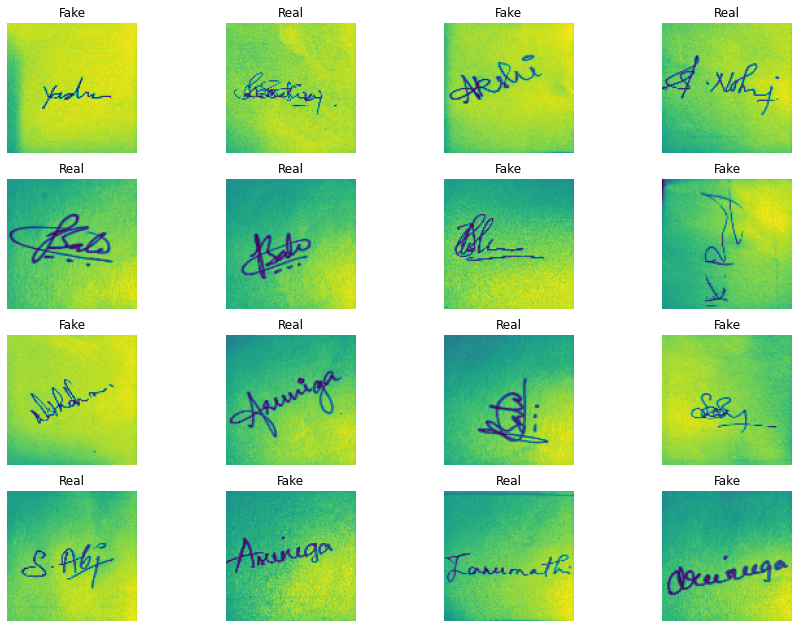

In [ ]:
plotImages(X_train,y_train)


In [ ]:
def plot_bar_chart_diagram(path_data):
    dic = {}
    for file in os.listdir(path_data):
        dem = 0
        for x in os.listdir(path_data + "/" + file):
            dem += 1
        dic[file] = dem
    print(dic)
    barlist = plt.bar(list(range(len(dic))),
                      list(dic.values()),
                      tick_label=list(dic.keys()))
    plt.show()

{'Real': 115, 'Fake': 115}


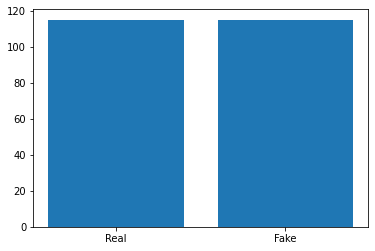

In [ ]:
plot_bar_chart_diagram("/content/drive/MyDrive/training_sign")


{'Fake': 46, 'Real': 46}


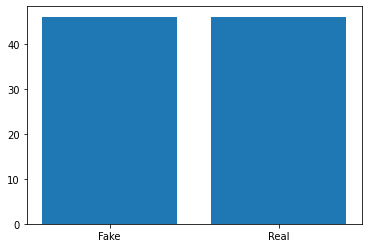

In [ ]:
plot_bar_chart_diagram("/content/drive/MyDrive/testing_sign")


In [ ]:
def preprocess(image):
    img = image.reshape(10000)
    return img

In [ ]:
def random_forest_training(trainX, trainY):
    forest = RandomForestClassifier(n_estimators=34)
    forest.fit(trainX, trainY)
    return forest

In [ ]:
def random_forest_predictions(testX, forest):
    predictions = forest.predict(testX)    
    return predictions

In [ ]:
xtrain = list(map(preprocess, X_train))
xval = list(map(preprocess, X_val))

In [ ]:
forest = random_forest_training(xtrain, y_train)
predictions = random_forest_predictions(xval, forest)

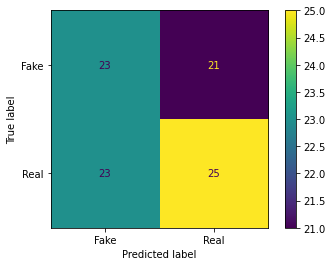

In [ ]:
display(ConfusionMatrixDisplay(confusion_matrix(predictions, y_val), display_labels=CATEGORIES).plot())

In [ ]:
print("Accuracy Score :",accuracy_score(predictions, y_val))

Accuracy Score : 0.5217391304347826


In [ ]:
img_array = cv2.imread("/content/drive/MyDrive/sample_test/IMG20221101131041.jpg")
new_array = cv2.resize(img_array, (100, 100))
new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY).reshape(10000)

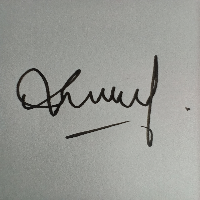

In [ ]:
from google.colab.patches import cv2_imshow
#cv2_imshow(img_array)
height = 200
width = 200
dimensions = (width, height)
new_image = cv2.resize(img_array, dimensions, interpolation=cv2.INTER_LINEAR)
cv2_imshow(new_image)

#cv2.size(img_array,50,20,30)
#im = Image.open(r"/content/drive/MyDrive/signature_dataset/sample_test/IMG20221103154752.jpg")
 


In [ ]:
predictedIndex = random_forest_predictions([new_array], forest)

In [ ]:
print("Predicted Class is",CATEGORIES[forest.classes_[predictedIndex[0]]])

Predicted Class is Fake


In [ ]:
import pickle

filename = 'real_fake_sign.pkl'
pickle.dump(forest, open(filename, 'wb'))